# NY State County-Level Childhood Lead Poisoning

In this IPython Notebook, I wanted to take a quick look at the NY State county-level BLL data in order to gain some perspective on how well (or poorly) NYC is doing in terms of childhood lead poisoning relative to the rest of the state. 

The BLL data for this analysis were downloaded from https://health.data.ny.gov/Health/Childhood-Blood-Lead-Testing-and-Incidence-of-Bloo/d54z-enu8. Athough there is zipcode-level data available from this website, it is incomplete and inconsistent with the county-level data. The county-level data is complete, so I am assuming for the purposes of this data challenge that it is correct.

In [2]:
#load packages
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
import numpy as np
%matplotlib inline
mpl.rc('font',size=12,weight='bold') #set default font size and weight for plots
rootpath = '/Users/Karen/Documents/Insight/Jobs/Arnold_Institute/'

In [3]:
#Read in NYC Neighbourhood data (neighbourhoods corresponding to the United Hospital Fund)

#This data was copy and pasted from the NYC Lead Poisoning Report, 2012, into a .csv file, 
#so it needs to be cleaned up a bit

data = pd.read_csv(rootpath+'Childhood_Blood_Lead_Testing_and_Incidence_of_Blood_Lead_Levels_of_10_mcg_dL_or_Greater_by_Zip_Code__Beginning_2003.csv')

In [4]:
data = data.dropna().reset_index(drop = True)

In [5]:
data.head()

,County Code,County,Zip,Year,Tests,10 – 15 mcg/dL,15 + mcg/dL,Total Elevated Blood Levels,"Rate per 1,000",Percent,County Location
0,1,Albany,All,2012,4979,28,20,48,10,1.0,"(42.678066, -73.814233)"
1,3,Allegany,All,2012,708,5,2,7,10,1.0,"(42.226801, -78.020567)"
2,7,Broome,All,2012,2685,21,5,26,10,1.0,"(42.122015, -75.933191)"
3,9,Cattaraugus,All,2012,1593,8,2,10,6,0.6,"(42.224267, -78.606673)"
4,11,Cayuga,All,2012,1169,9,5,14,12,1.2,"(42.940095, -76.560755)"


In [6]:
data.describe()

,County Code,Year,Tests,10 – 15 mcg/dL,15 + mcg/dL,Total Elevated Blood Levels,"Rate per 1,000",Percent
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,62.581722,2007.507909,3848.077329,22.453427,12.442882,34.896309,11.808436,1.180844
std,36.336079,2.871121,6942.357984,42.051423,22.065459,63.651683,9.267363,0.926736
min,1.000000,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2005.000000,708.000000,4.000000,2.000000,6.000000,6.000000,0.600000
50%,63.000000,2008.000000,1233.000000,8.000000,4.000000,12.000000,10.000000,1.000000
75%,95.000000,2010.000000,2819.000000,20.000000,12.000000,32.000000,15.000000,1.500000
max,123.000000,2012.000000,34505.000000,283.000000,152.000000,429.000000,60.000000,6.000000


In [37]:
#We want to add the NYC county data to this. We have comparable data for 2012 for "Lead Risk" but the NYC data for
#"Serious Lead Risk" is aggregated over the years 2010-2012. So, we need to do the same for the counties in order
#to properly compare them. We had a much better prediction for "Serious Lead Risk" at the NYC level, so we want to
#again, try to make a prediction for both classifications.

#We also want to include BLL data from previous years. We only have data for 2009 for the NYC counties but we have
#complete data for the other counties back to 2004. So, we will use all the data for the other counties and assume that
#NYC BLL data for the years 2004-2008 is the same as for year 2009.

data2012 = data[data["Year"]==2012]
data2011 = data[data["Year"]==2011]
data2010 = data[data["Year"]==2010]
data2009 = data[data["Year"]==2009]
data2008 = data[data["Year"]==2008]
data2007 = data[data["Year"]==2007]
data2006 = data[data["Year"]==2006]
data2005 = data[data["Year"]==2005]
data2004 = data[data["Year"]==2004]

dataEIBLL = pd.concat((data2012,data2011,data2010),axis=0)
dataEIBLL = dataEIBLL[['County','Tests','15 + mcg/dL']].groupby('County').sum()

dataEIBLLRate = dataEIBLL.iloc[:,1] * 1000 / dataEIBLL.iloc[:,0]

In [38]:
dataEIBLLRate=dataEIBLLRate.reset_index(drop=True)
dataEIBLLRate.name = "EIBLL Rate (2010-2012)"

In [39]:
#Merge new EIBLL Rate to 2012 BLL dataframe
data2012 = pd.concat((data2012,dataEIBLLRate),axis=1)
data2012 = data2012.rename(columns={'Total Elevated Blood Levels ': 'New Cases (2012)',\
                                    'Rate per 1,000': 'New Rate (2012)'})

In [40]:
data2012.head()

,County Code,County,Zip,Year,Tests,10 – 15 mcg/dL,15 + mcg/dL,New Cases (2012),New Rate (2012),Percent,County Location,EIBLL Rate (2010-2012)
0,1,Albany,All,2012,4979,28,20,48,10,1.0,"(42.678066, -73.814233)",5.365480
1,3,Allegany,All,2012,708,5,2,7,10,1.0,"(42.226801, -78.020567)",2.168257
2,7,Broome,All,2012,2685,21,5,26,10,1.0,"(42.122015, -75.933191)",4.005655
3,9,Cattaraugus,All,2012,1593,8,2,10,6,0.6,"(42.224267, -78.606673)",2.736266
4,11,Cayuga,All,2012,1169,9,5,14,12,1.2,"(42.940095, -76.560755)",2.841716


In [41]:
#Now, let's only extract the columns we need.
data2012 = data2012[['County','New Rate (2012)','EIBLL Rate (2010-2012)']]

In [42]:
#Now read in NYC county data and concatenate to data2012 dataframe
NYCdata = pd.read_csv(rootpath+'NYC_counties_BLL.csv')
NYCdata = NYCdata[['County','New Rate (2012)','EIBLL Rate (2010-2012)']]

data2012 = pd.concat((data2012,NYCdata),axis=0)
#sort by county
data2012 = data2012.sort_values(['County']).reset_index(drop=True)

BLL Rate Median is: 6.0 . Almost 3 times higher than the median for NYC!


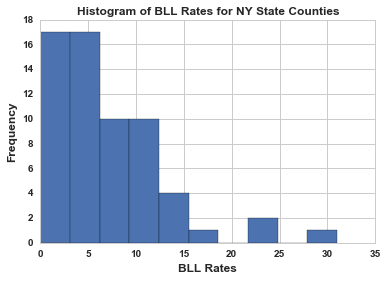

In [43]:
#plot histogram of BLL Rates
data2012['New Rate (2012)'].hist()
plt.xlabel('BLL Rates',fontsize=12,fontweight='bold')
plt.ylabel('Frequency',fontsize=12,fontweight='bold')
plt.title('Histogram of BLL Rates for NY State Counties',fontsize=12,fontweight='bold')
BLLratemed = data2012['New Rate (2012)'].median()
print "BLL Rate Median is:", BLLratemed,". Almost 3 times higher than the median for NYC!"

EIBLL Rate Median is: 2.30989244808 . Again, almost 3 times higher than the median for NYC!


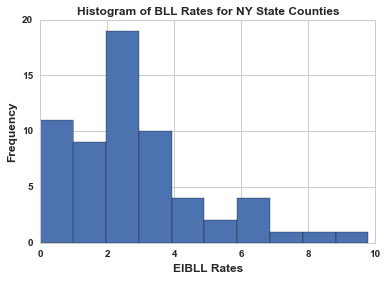

In [44]:
#plot histogram of EIBLL Rates
data2012['EIBLL Rate (2010-2012)'].hist()
plt.xlabel('EIBLL Rates',fontsize=12,fontweight='bold')
plt.ylabel('Frequency',fontsize=12,fontweight='bold')
plt.title('Histogram of BLL Rates for NY State Counties',fontsize=12,fontweight='bold')
EIBLLratemed = data2012['EIBLL Rate (2010-2012)'].median()
print "EIBLL Rate Median is:", EIBLLratemed,". Again, almost 3 times higher than the median for NYC!"

# Repeat Assumption 2 from NYC Notebook: BLL Case Rate Threshold
In order to identify NY State counties that are at risk of greater lead poisoning, we assume that the median BLL Rate is a good threshold for classification, i.e. a community is at less risk if its BLL Rate is below the median (class 0) and a community is at a greater risk if its BLL Rate is below the median (class 1). Using the median gives me balanced classes.

As for NYC, I have also created a second classification based on the median EIBLL Rate and I will try to classify this first following the methodology from the NYC analysis.

In [45]:
#create new class variables (denoted "Lead Risk" and "Serious Lead Risk" for each zipcode)
data2012.ix[data2012['New Rate (2012)']>=6, 'Lead Risk'] = 1
data2012.ix[data2012['New Rate (2012)']<6, 'Lead Risk'] = 0

data2012.ix[data2012['EIBLL Rate (2010-2012)']>=2.31, 'Serious Lead Risk'] = 1
data2012.ix[data2012['EIBLL Rate (2010-2012)']<2.31, 'Serious Lead Risk'] = 0

print "Note: Relative to the rest of the state NYC has low 'Lead Risk' and low 'Serious Lead Risk'"

Note: Relative to the rest of the state NYC has low 'Lead Risk' and low 'Serious Lead Risk'


# Repeat Assumption 3 from NYC Notebook: Features for the prediction model
Now we will incorporate county-level data from the American Community Survey (ACS), 2014. The data from the survey covers the years 2010-2014. For the purposes of this analysis, we will assume that this data adequately captures the important characteristics of each county even though it may not reflect the exact statistics for the county in the year 2012.

In [46]:
#Read in NYC Neighbourhood data from ACS

#data about housing
homedata = pd.read_csv(rootpath + 'homeny_county.csv')
homedata=homedata.iloc[2:,4:].reset_index(drop=True)
#data about the households
householddata = pd.read_csv(rootpath + 'householdny_county.csv')
householddata=householddata.iloc[2:,4:].reset_index(drop=True)
#data about the demograhphics
demodata = pd.read_csv(rootpath + 'demony_county.csv')
demodata=demodata.iloc[2:,4:].reset_index(drop=True)
#data about the economics
econdata = pd.read_csv(rootpath + 'econny_county.csv')
econdata=econdata.iloc[2:,4:].reset_index(drop=True)
#data about vehicles, fuel and phones
vfpdata = pd.read_csv(rootpath + 'vehiclefuelphoneny_county.csv')
vfpdata=vfpdata.iloc[2:,4:].reset_index(drop=True)

In [47]:
#the number of zipcodes (i.e., rows) are not the same in the ACS dataframes as the BLL dataframe, meaning
#that they do not have all the same zipcodes in common.
print "Number of rows in homedata:", len(homedata)
print "Number of rows in householddata:", len(householddata)
print "Number of rows in demodata:", len(demodata)
print "Number of rows in econdata:", len(econdata)
print "Number of rows in vfpdata:", len(vfpdata)
print "Number of rows in BLL data:", len(data2012), "(5 fewer than the other df's because we still need to add the NYC counties)"
#homedata = homedata.rename(columns={'esriid': 'ZipCode'})
#householddata = householddata.rename(columns={'esriid': 'ZipCode'})
#demodata = demodata.rename(columns={'esriid': 'ZipCode'})
#econdata = econdata.rename(columns={'esriid': 'ZipCode'})
#BLLdata['ZipCode'] = BLLdata['ZipCode'].astype(str)

Number of rows in homedata: 62
Number of rows in householddata: 62
Number of rows in demodata: 62
Number of rows in econdata: 62
Number of rows in vfpdata: 62
Number of rows in BLL data: 62 (5 fewer than the other df's because we still need to add the NYC counties)


In [48]:
#Let's restrict our analysis to the zipcodes in common
#So, we merge data sets based on zipcode (i.e., find the intersection)
countycat = pd.concat((data2012,homedata,householddata,demodata,econdata,vfpdata),axis=1)
print "Number of rows in merged dataframe:", len(countycat)

Number of rows in merged dataframe: 62


In [49]:
countycat = countycat.reset_index(drop=True)

In [50]:
#In order to calculate correlations between all of our features, we need to make sure that they are all numbers
#and not string. Do a quick type conversion.
for i in range(1,len(countycat.columns)):
    countycat[countycat.columns[i]] = countycat[countycat.columns[i]].astype(float)

In [51]:
countycat.head()

,County,New Rate (2012),EIBLL Rate (2010-2012),Lead Risk,Serious Lead Risk,TotHUs,pctOccHUs,pctOwnerOcc,pctRenterOcc,AvgOwnerHHSize,...,pctHHFElectric,pctHHFKerosene,pctHHFCoal,pctHHFWood,pctHHFSolar,pctHHFOther,pctHHFNoFuel,pctNoPlumbing,pctNoKitchen,pctNoPhone
0,Albany,10.000000,5.365480,1,1,137859,89.2,58.8,41.2,2.54,...,15.9,10.3,0.0,1.7,0,0.6,0.3,0.2,0.5,1.9
1,Allegany,10.000000,2.168257,1,0,26106,70.5,73.3,26.7,2.45,...,8.7,6.7,3.9,15.5,0,1.5,0.3,1.4,2.0,3.7
2,Bronx,2.194807,0.946097,0,0,518149,92.7,19.1,80.9,3.03,...,8.4,51.8,0.1,0.1,0,1.1,1.4,0.6,0.8,3.1
3,Broome,10.000000,4.005655,1,1,90139,88.1,66.1,33.9,2.49,...,11.4,11.7,0.7,3.8,0,0.8,0.4,0.3,0.8,2.5
4,Cattaraugus,6.000000,2.736266,1,1,41048,77.5,71.7,28.3,2.47,...,13.3,7.8,1.2,11.8,0,1.8,0.2,1.5,1.8,3.5


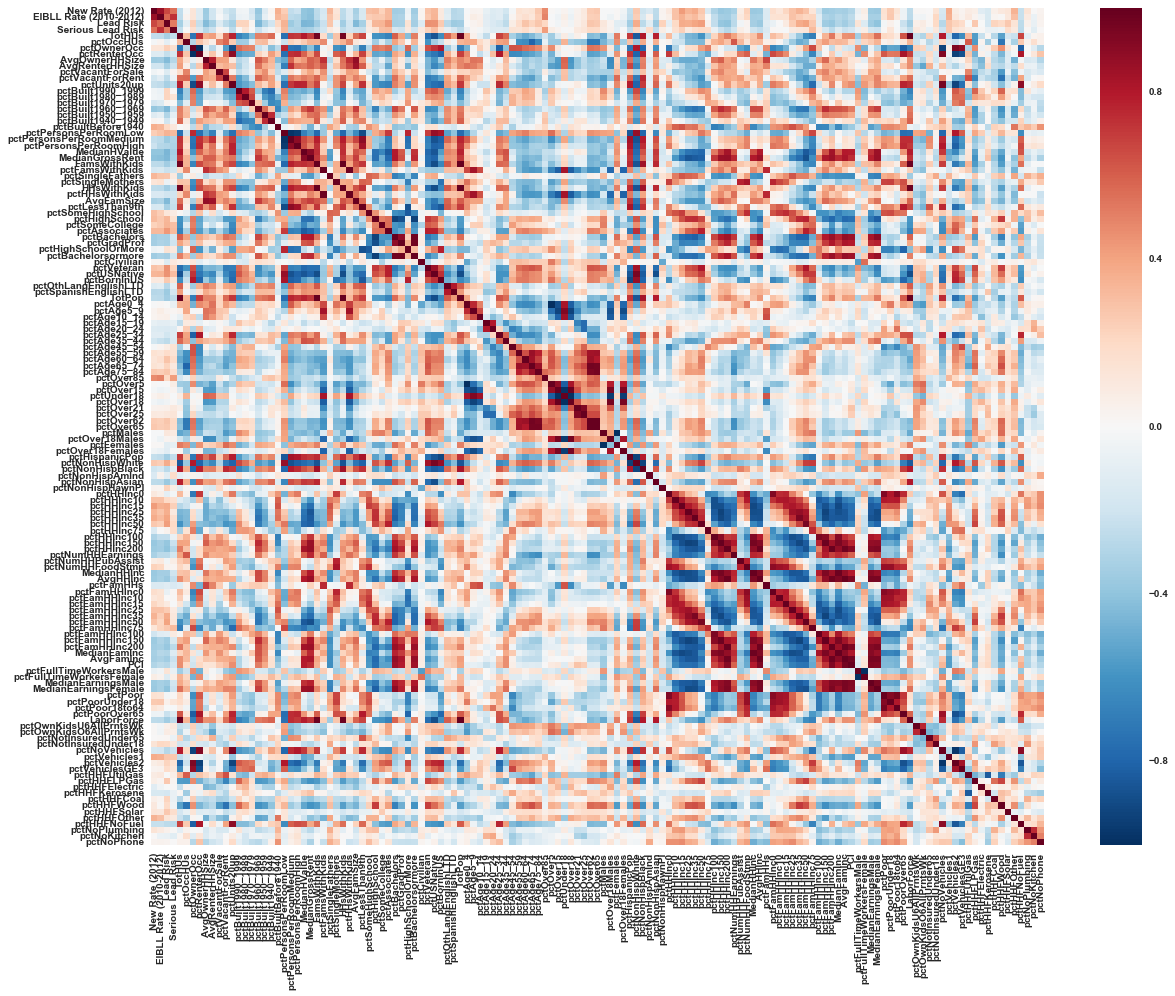

In [22]:
plt.figure(figsize=(20,15))
corr1 = sns.heatmap(countycat.corr())

# Now we will train a classification model
As for the NYC zipcode-level data, many of the features above are highly correlated and, as before, we will start with a logistic regression model with L1-regularization to reduce the number of features. 

For the counties, we will start by trying to classify "Lead Risk", based on BLL rates (BLL greater than 10) because it turns out that we get a better prediction for "Lead Risk". Although, we get a better prediction, it is still not great, suggesting that more data is needed to better classify counties with higher lead poisoning risk. 

Of course, BLL rates from past years for each county can potentially inform the prediction model. I have not included these features here, but this would be an obvious next step. 

In [52]:
#Separate input and output data
outputLR = countycat.iloc[:,3] #"Lead Risk"
outputSLR = countycat.iloc[:,4] #"Serious Lead Risk"

#Use only features that have no specific lead information
#If we have time, we will add the information from the NYC Lead Poisoning Report, 2009. 

features = countycat.iloc[:,5:]
print "The number of features is:", len(features.columns)

The number of features is: 133


In [53]:
#Since we are going to use regularization, we need to scale the data
from sklearn.preprocessing import StandardScaler

scale_inst = StandardScaler().fit(features)
features_scale = scale_inst.transform(features)

In [54]:
#Split data into training and testing using sklearn cross-validation (70% training/30% testing data)

#Start with "Serious Lead Risk" as output
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.asarray(features_scale),\
                                     np.asarray(outputLR), test_size=0.3,random_state=9)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.cross_validation import KFold

model = LogisticRegression(penalty='l1')

#use 10-fold cross-validation to test robustness of L1 regularization and accuracy score
cvn = 10
k = 0
coeffs = np.zeros((cvn,len(features.columns)))
accuracy_score = np.zeros((cvn))
kf = KFold(len(y_train), n_folds=cvn)
for train_index, test_index in kf:
    X_train_cv = np.zeros((len(train_index),len(features.columns)))
    y_train_cv = np.zeros((len(train_index)))
    X_test_cv = np.zeros((len(test_index),len(features.columns)))
    y_test_cv = np.zeros((len(test_index)))
    for i in range(len(train_index)):
        X_train_cv[i,:] = X_train[train_index[i],:]
        y_train_cv[i] =  y_train[train_index[i]]
    for j in range(len(test_index)):
        X_test_cv[j,:] = X_train[test_index[j],:]
        y_test_cv[j] = y_train[test_index[j]]
    predicted = model.fit(X_train_cv,y_train_cv).predict(X_test_cv)
    expected = y_test_cv
    accuracy_score[k] = metrics.accuracy_score(expected,predicted)
    coeffs[k,:] = model.coef_
    k = k + 1

print "Testing data metrics:"
mean_scores = np.mean(accuracy_score)
print 
print "Mean cross-validated accuracy score = ", mean_scores

Testing data metrics:

Mean cross-validated accuracy score =  0.675


# Our prediction is not very good given the data used for the features.
I tried other models as well. SVC, NB and KNN give very similar accuracy scores, while Random Forest performs less well.

Clearly, additional data is needed to obtain a better prediction of county-level lead poisoning rates. 